In [2]:
# this ipython command loads a special backend for notebooks
%matplotlib notebook
import matplotlib.pyplot as plt

from IPython.core.display import display as display_base, HTML

# https://stackoverflow.com/questions/21356014/how-can-i-insert-a-new-tag-into-a-beautifulsoup-object

# https://github.com/lepture/mistune
import mistune
markdown = mistune.Markdown()

def display(code):
    return display_base(HTML(code))

# Studying mixing efficiency and stratified turbulence with experiments and open-science
$\newcommand{\kk}{\boldsymbol{k}}
\newcommand{\eek}{\boldsymbol{e}_\boldsymbol{k}}
\newcommand{\eeh}{\boldsymbol{e}_\boldsymbol{h}}
\newcommand{\eez}{\boldsymbol{e}_\boldsymbol{z}}
\newcommand{\cc}{\boldsymbol{c}}
\newcommand{\uu}{\boldsymbol{u}}
\newcommand{\vv}{\boldsymbol{v}}
\newcommand{\bnabla}{\boldsymbol{\nabla}}
\newcommand{\Dt}{\mbox{D}_t}
\newcommand{\p}{\partial}
\newcommand{\R}{\mathcal{R}}
\newcommand{\eps}{\varepsilon}
\newcommand{\mean}[1]{\langle #1 \rangle}
\newcommand{\epsK}{\varepsilon_{\!\scriptscriptstyle K}}
\newcommand{\epsA}{\varepsilon_{\!\scriptscriptstyle A}}
\newcommand{\epsP}{\varepsilon_{\!\scriptscriptstyle P}}
\newcommand{\epsm}{\varepsilon_{\!\scriptscriptstyle m}}
\newcommand{\CKA}{C_{K\rightarrow A}}
\newcommand{\D}{\mbox{D}}$


- LEGI group: **Pierre Augier**, **A. Campagne**, J. Sommeria, S. Viboud, C. Bonamy, N. Mordant...
- KTH group (Stockholm, Sweden): E. Lindborg, A. Vishnu, A. Segalini
- Diane Micard (LMFA)

<br />

<center> Seminar LMFA, 08/09/2017 </center>

# Mixing efficiency and mixing coefficient

$$Ri_f \equiv \frac{\eps_P}{\eps_K + \eps_P} \quad \mbox{ and } \quad \Gamma \equiv \frac{\eps_P}{\eps_K},$$

where $\eps_P$ and $\eps_K$ are the potential and kinetic energy dissipation.

### Simple case: mixing a stably stratified fluid by stirring

<div align="middle" style="position: relative;"> 
  <img src="./fig/fig_scheme_mixing.png" style="height:280px; margin: 1 0;"> 
</div>

- stirring: injection of kinetic energy ($P_K$)

- conversion from kinetic energy to potential energy (buoyancy flux)
  $- \mean{b w} = C_{K\rightarrow A} = \eps_P$

- dissipation of kinetic and potential energy $\eps_K + \eps_P = P_K$

- energy spent for mixing =  dissipation of potential energy

$$ Ri_f \equiv \frac{\eps_P}{\eps_K + \eps_P} = \frac{\mbox{energy spent for mixing}}{\mbox{total injection}}$$

# Navier-Stokes equations under Boussinesq approximation

$$\begin{align}
\D_t \vv &= -\bnabla p_{tot} + b_{tot} \eez + \mathbf{F} +  \nu \bnabla^2 \vv,\\
\D_t b_{tot} &= \kappa \bnabla^2 b_{tot},
\end{align}$$

where 

- $\bnabla \cdot \vv = 0$,
- $b_{tot} = -\frac{g}{\rho_0} (\rho_0 + \int_{z_0}^z d_z\bar\rho dz  + \rho) = -g + N^2 (z -z_0) + b$,
- $N^2 = d_z\bar b_{tot}$ the Brunt-Väisälä frequency is constant (linearly stratified)

In [84]:
m0 = markdown(r"""
<h4 style="margin-top: 0.2em;"> Energetic </h4>

- Kinetic energy $\mathcal{E}_K = \mean{\vv^2}/2$
- Potential energy $\mathcal{E}_P = \mean{\rho g z/ \rho\_0} = -\mean{b\_{tot} z}$

$$ \mathcal{E}_P = -\frac{(HN)^2}{12} - \mean{b z}. $$
""")

m1 = markdown(r"""
<h4 style="margin-top: 0.2em;"> Available Potential Energy (APE) </h4>

$$\mathcal{E}_P + \frac{(HN)^2}{12} = \mean{b z}$$

- Equations for the buoyancy fluctuations $b$

$$\begin{align}
\D_t \vv &= -\bnabla p + b\eez + \mathbf{F} +  \nu \bnabla^2 \vv \\\\
\D_t b &= - N^2 w + \kappa \bnabla^2 b
\end{align}$$

- Density of APE $E_A$:

$$\begin{align}
d_t E_K  &= -\bnabla \cdot (p \vv) - \CKA - \epsK\\\\
d_t E_A  &= \CKA - \epsA
\end{align}$$
""")

ml = markdown(r"""
- $E_K = \vv^2/2$,
- $E_A = b^2/(2N^2)$,
""")

mc = markdown(r"""
- $\epsK = - \nu \vv \cdot \bnabla^2 \vv$,
- $\epsA = - \kappa b \cdot \bnabla^2 b$,
""")

mr = markdown(r"""
- $\CKA = - b w$ 
""")

code = rf"""
<div class="fragment current-visible">
{m0}
</div>

<div class="fragment current-visible">
{m1}

{markdown('where')}

<div class='left' style='float:left;width:33%'>
{ml}
</div>

<div class='center' style='float:left;width:33%'>
{mc}
</div>

<div class='right' style='float:right;width:33%'>
{mr}
</div>
</div>
"""
display(code)

# Why is the mixing coefficient $\Gamma$ important?

Ocean models are LES (scale filter $[]$). 

<br />

- Approximation of a term similar to a Reynolds stress with a turbulent diffusivity

$$- \bnabla \cdot [\vv b_{tot}] \simeq \kappa_t \bnabla^2 [b_{tot}] $$

- Approximation of the turbulent diffusivity from a flux law for the buoyancy flux:

$$\mean{w b_{tot}} \simeq - \kappa_t d_z \bar b_{tot} = - \kappa_t N^2  \Rightarrow \kappa_t = \frac{\CKA}{N^2}.$$

- Approximation of the energy conversion $\CKA$ by a proportionality relation

$$ \CKA = \Gamma \epsK, $$
with $\Gamma = 0.2$ a constant!

### But actually $\Gamma$ is not really a constant! 

### And this has consequences for the large-scale results of the ocean models!

### We need better parametrization of the mixing

# Stratified flows and their different régimes

Introduction of 2 important non-dimensional numbers

<br />

- horizontal Froude number $F_h$ 

<center>(quantifying the effects of stratification)</center>

<br /><br />

- buoyancy Reynolds number $\R$ 

<center>(quantifying the effects of viscosity on the largest scales)</center>

# Strongly anisotropic flows

In [8]:
code = r"""
<div class='left' style='float:left;width:48%'>
  <div align="middle" style="position: relative;"> 
    <img src="./fig/fig_Goderferd_2003.jpg" style="height:300px; margin-bottom: 2em;"> 
      <div style="font-size: 65%; position: absolute; bottom: -6%; left: 22%;">
        DNS (Goderferd & Staquet, 2003)
      </div>
      <div style="font-size: 100%; position: absolute; top: 50%; right: 75%;">
        $\displaystyle \frac{\p u_x}{dz}$
      </div>
    </img>
  </div>
</div>

<div class='right' style='float:right;width:48%'>
  <div align="middle" style="position: relative;"> 
    <img src="./fig/fig_HolbrookFer2005.jpg" style="height:300px"> 
      <div style="font-size: 60%; position: absolute; bottom: -6%; left: 5%;">
        Seismic reflection (Holbrook & Fer, 2005)
      </div>
    </img>
  </div>
</div>
"""

m0 = markdown(r"""
- low vertical velocity
- vertical length scale $L_v \ll$ horizontal length scale $L_h$
- $L_v \sim$ buoyancy length scale $L_b = U/N $, where $U$ is the characteristic horizontal velocity

""")

m1 = markdown(r"""
### Influence of the stratification, horizontal Froude number

$$F_h = \frac{U}{NL_h} = \frac{L_b}{L_h} < 1$$
""")

code += rf"""
{m0}

<div class="fragment">
{m1}
</div>
"""

display(code)

# Theory of "strongly stratified turbulence"

Linborg (2006)

In [11]:
code = r"""
<div class='left' style='float:left;width:48%'>
  <div align="middle" style="position: relative;"> 
    <img src="./fig/shema_strat_turb_simple.png" style="height:500px"> 
      <div style="position: absolute; top: 7%; right: 52%;">
        $C_1 {\eps_K}^{2/3} {k_x}^{-5/3}$
      </div>
      <div style="position: absolute; top: 19%; right: 40%;">
        $N^2 {k_z}^{-3}$
      </div>
      <div style="position: absolute; top: 60%; right: 50%;">
        Direct energy cascades<br />($E_K$ and $E_A$)
      </div>
    </img>
  </div>
</div>

<div class='right' style='float:right;width:48%'>
  <p> Different scales: </p>
  <ul>
    <li><p>buoyancy length scale $L_b=U/N$</p>
    </li>
    <li>
      <p>Ozmidov length scale $l_o= (\varepsilon_K/N^3)^{1/2}$ </p>
      <p style="font-size: small;">"the largest horizontal scale that can overturn" (Riley & Lindborg, 2008)</p>
    </li>
    <li>
      <p>Kolmogorov length scale $\eta$ (dissipative structures) </p>
    </li>
  </ul>

  <div class="fragment">

"""

code += markdown(r"""
### Viscous condition $l_o \gg \eta$

buoyancy Reynolds number 
$$\displaystyle \R = \left( \frac{l_o}{\eta} \right)^{4/3} \sim Re {F_h}^2 \gg 1$$

""")

code += """
  </div>
</div>
"""

display(code)

# Order of magnitude of $F_h$ and $Re$

- In the oceans and the atmosphere, $L_h \gg 1$ so that $F_h \ll 1$ and $\R \gg 1$

- DNS fine resolution ($\sim 10^3 \times 10^3 \times 10^2$ grid points): $\R \simeq 10$

<div align="middle" style="position: relative;"> 
  <img src="./fig/vert_crosssection_Brethouwer.jpg"  style="height:150px;">
  <div style="position: absolute; bottom: 30%; left: 30%;">
    $$b(x,z)$$
  </div>
  <div style="position: absolute; bottom: 5%; left: 30%; font-size: 70%;">
    Brethouwer, Billant, Chomaz & Lindborg (2007)
  </div>
</div>

- In the laboratory experiments

  In water with stratification with salt $\Rightarrow N \simeq 1$ rad/s and $\nu \simeq 10^{-6}$ m$^2$/s

  - $F_h = \frac{U}{L_hN} \ll 1 \Rightarrow$ slow motion

  - $\R = Re {F_h}^2 \gg 1 \Rightarrow$ need very large $Re$

  **Large Reynolds + slow motion $\Rightarrow$ very large apparatus**

# Flow regimes in stratified fluids in the $[F_h,\ \R]$ parameter space

<div align="middle"> <img src="./fig/fig_R_vs_Fh_other_studies.png"  style="height: 600px"> </div>

# Scaling laws for the mixing coefficient in the different turbulent régimes

<center>
$\R > 10 \Rightarrow$ Turbulent $\Rightarrow$ $\displaystyle \Gamma = \frac{\eps_A}{\eps_K} \sim \left(\frac{b}{NU}\right)^2$
</center>

- Weakly stratified turbulence (passive scalar)

$$\D_t b \sim - N^2 w \Rightarrow b = N^2 L_h \Rightarrow \Gamma \sim {F_h}^{-2}$$

- Strongly stratified turbulence (double energy cascade) $ \Rightarrow \Gamma \simeq 1 $

# Methods: experiments in the Coriolis platform

In [13]:
code = r"""
<div class="fragment fade-out" data-fragment-index="0" style='float:left;width:100%'>

  <div class='left' style='float:left; width:100%;'>
    <div align="left" style='position: relative;'>
      <img src="./fig/coriolis2.jpg"
           style="height: 400px; margin-bottom: 1em;"> 
      <div align="center" style="position: absolute; top: 45%; right: 20%;">
        The Coriolis platform <br />(13 m diameter)
      </div>
    </div>
  </div>

  <div class='left' style='float:left;width:100%'>
  <center>
    Used by international researchers through European projects (Euhit, Hydralab).
  </center>
  </div>
</div>

<div class="fragment current-visible" data-fragment-index="0" style='float:left;width:100%'>

  <h3 style="margin-bottom: 0.3em;margin-top: 0em;">
    The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform
  </h3>

  <div class='left' style='float:left;width:48%'>
    <div align="middle">
      <img src="./fig/fig_scheme_milestone.jpg"  style="height:370px;">
    </div>
  </div>

  <div class='right' style='float:right;width:48%'>
    <!-- ffmpeg -i input.mov -ss 0 -t 10 -b:v 1000k output.mp4 -->
    <video align="middle" height="370px" controls loop muted>
      <source src="video/moving_carriage.mp4" type="video/mp4">
      Your browser does not support the video tag.
    </video>
  </div>
  <div class='left' style='float:left;width:100%'>
  
  <h4 style="margin-top: 0.2em;"> 2 sets of experiments </h4>

""" + markdown(r"""
- Summer 2016 (a collaboration between KTH, Stockholm, Sweden and LEGI): we tried many things. 

- Summer 2017: focused on mixing without rotation

  * larger horizontal cylinders (25 cm and 50 cm diameter)
  * better measurements of the density profiles
  * vertical cylinders (producing waves)
  * alcool to decrease differences in refractive index (actually no alcool!)

""") + r"""
  </div>
</div>
"""

display(code)

# Methods: introduction to open-science and open-source

# Fluid mechanics uses and progresses with new technologies

- cars,  aircrafts
- computers

### A new technology of today: computers, webs, data

Example: **Youtube**! Here, video of *Despacito* seen 3 480 689 020 times!

- World Wide Web
- big data (storage, flux)
- companies (Youtube, Google)
- algorithms
- open-source (using in particular Python)

# Open-source today

Big changes in how programs are developed:

- a lot of money (web, big companies as google or facebook and startups)
- serious, good quality, good coding practices: 
  - distributed version control software (Git, Mercurial)
  - forges for collaborative development (github, bitbucket, gitlab)
    * issue tracker
    * continuous integration
  - documentation
  - unittests
  - benchmarking

- new tools and environments (for example Python)

# Open-science

- Transparency in scientific methods and results

- Openness to full scrutiny

- Ease of reproducibility

- No more "reinventing the wheel" - particularly in code development

### More practical:

- Doing sciences with open-source methods and tools

- Share using the web

<br />

### Remark: different stories and tools for different communities

Fluid mechanics not in advance... Dominance of Fortran and Matlab, 

- good tools for few very specialized purposes 
- but not plugged to the open-source and web dynamics

# Python language and its scientific ecosystem for open-science

In [91]:
m0 = markdown(r"""
- dynamic
- generalist
""")

m1 = markdown(r"""
- fast prototyping
- easy to learn and teach
- multi-platform
""")

code = rf"""
<div class="fragment fade-out" data-fragment-index="0">
  {markdown('A well-thought language:')}

  <div class='left' style='float:left;width:48%'>
    {m0}
  </div>

  <div class='right' style='float:right;width:48%'>
    {m1}
  </div>
</div>
"""

m2 = markdown(r"""
**Scientific ecosystem**: strong dynamics, rich and complicated landscape (many, many projects):
- rich Python standard library
- core scientific Python packages (ipython, jupyter, numpy, scipy, matplotlib),
- many specialized tools (oriented toward methods and goals),
""")

m20 = markdown(r"""
* performance (cython, pythran, numba, ...)
* GPU, distributed computing
* visualisation (see [this presentation](https://github.com/rougier/python-visualization-landscape), for fluid: 
  [Paraview](https://www.paraview.org/), [Visit](http://visit.llnl.gov/), ...)
* symbolic math (sympy)
* scientific file format (h5py, h5netcdf, ...)
* statistics ([statsmodels](http://www.statsmodels.org))
* automatization, Internet of Things, [Microcontrollers](https://micropython.org/)
* image processing ([scikit-image](http://scikit-image.org/))
* database (SQL, NoSQL, ORM)
* Geographic Information System ([Qgis](http://www.qgis.org))
* Artificial Intelligence, Machine Learning, [Deep Learning](http://www.pyimagesearch.com/2016/06/27/my-top-9-favorite-python-deep-learning-libraries/)
* GUI (PyQt, kivy, ...)
* web framework
""")

code += rf"""
<div class="fragment" data-fragment-index="0">
  {m2}
  <ul>
    <div class="fragment current-visible" data-fragment-index="1">{m20}</div>
  </ul>
</div>
"""

m3 = markdown(r"""
- libraries by and for scientific communities (oriented towards subjects)
  * [astropy](http://www.astropy.org/) and sunpy (astronomy, see for example [LIGO](https://losc.ligo.org))
  * [biopython](https://github.com/biopython/biopython) (molecular biology)
  * Nipy and Dipy (neurology)
  * [obspy](https://github.com/obspy/obspy/wiki) (seismology)
  * atmospheric and oceanic sciences (see for example [this post](https://drclimate.wordpress.com/2016/10/04/the-weatherclimate-python-stack/))
""")

m4 = markdown(r"""
  * fluid mechanics... only the very beginning of this trend...
""")

code += rf"""
<div class="fragment" data-fragment-index="2">
  <br />

  {m3}
  <br />
  <br />
  <ul>
    {m4}
  </ul>
</div>
"""

display(code)

# Remark on a technological trend: exotic architecture for computers

<center>as Graphics Processing Units...</center>

- Difficult to use efficiently (very specialized coding)

- low-level languages versus high-level languages?

In [6]:
code = r"""
<div style="position: relative;text-align: center;"> 
  <img src="./fig/nature_alphago.png" style="height:220px">
    <img src="./fig/alphago.png" 
         style="height:60px;position: absolute; top: 30px; left: 280px;"> 
  </img>
</div>
"""

m = markdown(r"""
Tensorflow (deep learning library by Google)

$\rightarrow$ main APIs in Python""")

code += rf"""
<div style="text-align: center;">
  <div style="position: relative;"> 
    <img src="./fig/tensorflow_logo.jpg" style="height:200px"> 
      <div style="position: absolute; top: 50px; left: 280px;">
        {m}
      </div>
    </img>
  </div>
</div>
"""

display(code)

# A contribution to open-science: the fluiddyn project

Open-source, documented, tested, continuous integration

- [fluiddyn](https://foss.heptapod.net/fluiddyn/fluiddyn): base package containing utilities
- [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of laboratory experiments
- [fluidimage](https://foss.heptapod.net/fluiddyn/fluidimage): scientific treatments of images (PIV)
- [fluidfft](https://foss.heptapod.net/fluiddyn/fluidfft): C++ / Python Fourier transform library (highly distributed, MPI, CPU/GPU, 2D and 3D)
- [fluidsim](https://foss.heptapod.net/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D
- [fluidfoam](https://github.com/fluiddyn/fluidfoam): Python utilities for openfoam
- [fluidcoriolis](https://foss.heptapod.net/fluiddyn/fluidcoriolis): running and analyzing experiments in the Coriolis platform

<br />

### Main developpers: 

- Pierre Augier (LEGI)
- Cyrille Bonamy (LEGI)
- Antoine Campagne (LEGI)
- Ashwin Vishnu (KTH)
- Julien Salort (ENS Lyon).

# Studying mixing efficiency and stratified turbulence with experiments and open-science

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<div class='left' style='float:left;width:100%'>
  <div class='left' style='float:left;width:48%'>
    <div align="middle">
      <img src="./fig/milestone_topview.jpg" style="height:370px; margin: 20px 0px;">
    </div>
  </div>

  <div class='right' style='float:right;width:48%'>
    <div align="middle">
      <img src="./fig/milestone_particles_long_expo.jpg" style="height:370px; margin: 20px 0px;">
    </div>
  </div>
</div>
  
  
- LEGI group: **Pierre Augier**, **A. Campagne**, J. Sommeria, S. Viboud, C. Bonamy, N. Mordant...
- KTH group (Stockholm, Sweden): E. Lindborg, A. Vishnu, A. Segalini
- Diane Micard (LMFA)

# The MILESTONE experiment

In [12]:
code = r"""
<div class="fragment fade-out" data-fragment-index="0" style='float:left;width:100%'>
  <div align="middle"> 
    <img src="./fig/scheme_exp_grid_MILESTONE_Euhit.png"  style="height: 600px; margin-bottom: 0.6em;">
    Top view (MILESTONE 2016)
  </div>
</div>

<div class="fragment current-visible" data-fragment-index="0" style='float:left;width:100%'>
  <h3 style="margin-bottom: 0.6em;">
    A new carriage for the Coriolis plateform!
  </h3>

  <div class='left' style='float:left;width:48%'>
    <div align="middle">
      <img src="./fig/milestone16_carriage.jpg"  style="height:370px;">
    </div>
  </div>

  <div class='right' style='float:right;width:48%'>
    <!-- ffmpeg -i input.mov -ss 0 -t 10 -b:v 1000k output.mp4 -->
    <video align="middle" height="370px" controls loop muted>
      <source src="video/moving_carriage.mp4" type="video/mp4">
      Your browser does not support the video tag.
    </video>
  </div>
  
""" + markdown(r"""
- 3 m $\times$ 1 m
- runs on tracks (13 m long)
- good control in position ($\Delta x<$ 5 mm) and in speed ($U< 25$ cm/s)
""") + r"""  
  
</div>

<div class="fragment current-visible" style='float:left;width:100%'>
  <h3 style="margin-bottom: 0.6em;">
    Measurements: PIV and probes (density, temperature)
  </h3>

  <div class='left' style='float:left;width:35%'>
    <center>
      <video height="400" controls loop muted>
        <source src="video/scanning_piv.mp4" type="video/mp4">
        Your browser does not support the video tag.
      </video>
    </center>
    scanning PIV
  </div>
  
  <div class='center' style='float:left;width:45%'>
    <div align="middle"> <img src="./fig/fig_scheme_milestone.jpg"  style="height: 400px"> </div>
  </div>

  <div class='right' style='float:right;width:20%'>
    <center>
      <video height="400" controls loop muted>
        <source src="video/moving_traverse.mp4" type="video/mp4">
        Your browser does not support the video tag.
      </video>
    </center>
    traverse
  </div>

</div>

"""

display(code)

# [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of experiments in fluid mechanics



In [6]:
m0 = markdown(r"""
(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

For the MILESTONE experiments:
- moving carriage, motor (Modbus TCP), position sensor (quadrature signal)
- probes attached to a transverses (Modbus TCP)

- scanning Particle Image Velocimetry (PIV):
  - oscillating mirror driven by an acquisition board
  - cameras triggered by a signal produced by an acquisition board

Issue: control with computers the interaction and synchronization of the objects
""")

m1 = markdown(r"""
(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

- Object-oriented programming
- Very easy to write instrument drivers
- Automatic documentation for the instrument drivers
- Simple servers with the Python package `rcpy`

#### Example for the carriage
- `motor.py`
- `position_sensor.py`
- `position_sensor_server.py`
- `position_sensor_client.py`
- `carriage.py`
- `carriage_server.py`
- `carriage_client.py`
""")

m2 = markdown(r"""
A little bit of Graphical User Interface is easy, fun and useful. We use PyQt.

<div align="middle"> <img src="./fig/gui_carriage.jpg"  style="width: 45%"> </div>

Remark: reusable code, here, random movement for another experiment.
""")

code = rf"""
<div class="fragment fade-out" data-fragment-index="0" style='float:left;width:100%'>
{m0}
</div>

<div class="fragment current-visible" data-fragment-index="0" style='float:left;width:100%'>
{m1}
</div>
  
<div class="fragment current-visible" style='float:left;width:100%'>
{m2}
</div>

"""

display(code)

# How to estimate the mixing coefficient?

$$\Gamma = \frac{\eps_P}{\eps_K}$$


- Kinetic energy dissipation rate $\eps_K$: 

  * $\eta$ very small: impossible to measure accuratly the velocity gradients

  * decay of kinetic energy after a stroke. Need many vector fields $\Rightarrow$ scanned horizontal PIV
  
<br />

- APE dissipation rate $\eps_P$: 

  * $\kappa$ smaller than $\nu$! 
  
  * APE decay after one stroke...

  * long-term evolution of the stratification after many strokes $\Rightarrow$ density profiles

### Processing of experimental data 

Very large series of images and probe data $\Rightarrow$ calcul on the LEGI clusters

# [fluidimage](https://foss.heptapod.net/fluiddyn/fluidimage): scientific treatments of images

(in collaboration with Cyrille Bonamy and Antoine Campagne, LEGI)

Many images (~ 20 To of raw data): embarrassingly parallel problem

<br />

- Clusters and PC, with CPU and/or GPU
- **Asynchronous** computations 
  * **topologies** of treatments
  * IO and CPU bounded tasks are splitted
  * compatible with big data frameworks as Storm
- Efficient algorithms and tools for fast computation with Python (Pythran, Theano, Pycuda, ...)

- Images preprocessing

- 2D and scanning stereo PIV

- Utilities to display and analyze the PIV fields

  * Plots of PIV fields (similar to PivMat, a Matlab library by F. Moisy) 
  * Calcul of spectra, anisotropic structure functions, characteristic 
  turbulent length scales

Remark: we continue to use UVmat for calibration

# Calcul of scanning PIV on the LEGI cluster

Example of scripts to launch a PIV computation:

<br />

```python

from fluidimage.topologies.piv import TopologyPIV

params = TopologyPIV.create_default_params()

params.series.path = '../../image_samples/Karman/Images'
params.series.ind_start = 1
params.piv0.shape_crop_im0 = 32
params.multipass.number = 2
params.multipass.use_tps = True
# params.saving.how has to be equal to 'complete' for idempotent jobs
# (on clusters)
params.saving.how = 'complete'
params.saving.postfix = 'piv_complete'

topology = TopologyPIV(params, logging_level='info')
topology.compute()
```
<br />

**Remark:** parameters in an instance of `fluiddyn.util.paramcontainer.ParamContainer`. Much better than in text files or free Python variables!

- avoid typing errors
- the user can easily look at the available parameters and their default value
- documentation for the parameters (for example for the [PIV topology](http://fluidimage.readthedocs.io/en/latest/generated/fluidimage.topologies.piv.html#module-fluidimage.topologies.piv))

# Calcul of scanning PIV on the LEGI cluster

Remark: launching computations on cluster is highly simplified by using fluiddyn:

<br />

```python
from fluiddyn.clusters.legi import Calcul7 as Cluster

cluster = Cluster()

cluster.submit_script(
    'piv_complete.py', name_run='fluidimage',
    nb_cores_per_node=8,
    walltime='3:00:00',
    omp_num_threads=1,
    idempotent=True, delay_signal_walltime=300)
```


# Analysis and production of scientific figures

- For one experiments, a lot of different files for different types of data (txt and hdf5 files)
- Classes for experiments and types of data (for example probe data or PIV field).

In [7]:
from fluidcoriolis.milestone17 import Experiment as Experiment17
iexp = 21
exp = Experiment17(iexp)
exp.name

'Exp21_2017-07-11_D0.5_N0.55_U0.12'

In [8]:
print(f'N = {exp.N} rad/s and Uc = {exp.Uc} m/s')

N = 0.55 rad/s and Uc = 0.12 m/s


In [9]:
print(f'Rc = {exp.Rc:.0f} and Fh = {exp.Fhc:.2f}')

Rc = 11425 and Fh = 0.44


In [10]:
print(f'{exp.nb_periods} periods of {exp.period} s')

3 periods of 125.0 s


In [11]:
print(f'{exp.nb_levels} levels for the scanning PIV')

5 levels for the scanning PIV


# Studying and plotting PIV data

In [2]:
from fluidcoriolis.milestone import Experiment
exp = Experiment(73)

In [3]:
cam = 'PCO_top'  # MILESTONE16
# cam = 'Cam_horiz'  # MILESTONE17
pack = exp.get_piv_pack(camera=cam)

In [3]:
piv_fields = pack.get_piv_array_toverT(i_toverT=80)

/home/pierre/16MILESTONE/Data_light/PCO_top/Exp73_2016-07-13_N0.8_L6.0_V0.16_piv3d/v_exp73_t080.h5


In [77]:
piv_fields = piv_fields.gaussian_filter(0.5).truncate(2)

<IPython.core.display.Javascript object>


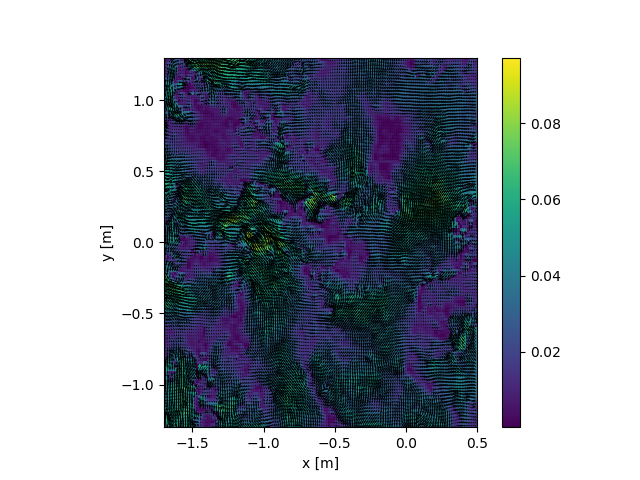

In [79]:
piv = pack.get_piv2d(ind_time=10, level=1)
piv = piv.gaussian_filter(0.5).truncate(2)
piv.display()
_ = plt.xlim([-1.7, 0.5])
_ = plt.ylim([-1.3, 1.3])

<IPython.core.display.Javascript object>


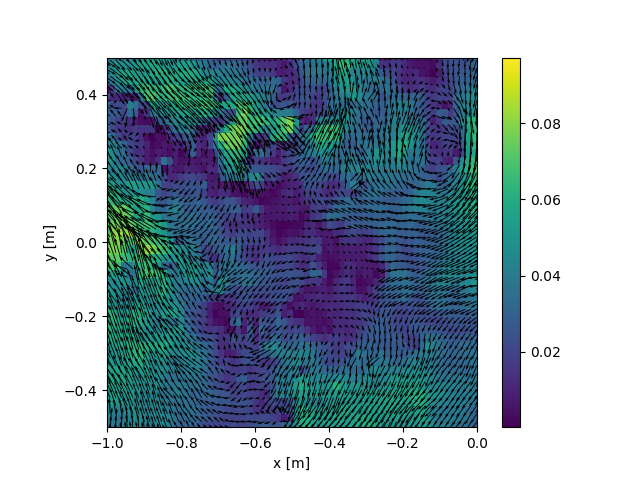

In [81]:
piv.display()
_ = plt.xlim([-1., -0.])
_ = plt.ylim([-0.5, 0.5])

In [4]:
from fluidcoriolis.milestone.results_energy_budget import ResultEnergyBudgetExp
r = ResultEnergyBudgetExp(73, camera=cam)

iexp = 73; N = 0.8 rad/s; Uc = 16 cm/s
epsK = 5.49e-05 m^2 s^-3
urms = 3.14e-02 m/s
(urms/Uc)^2 = 4e-02 ; epsK/epsc = 3e-03
Fht = 1.0e-01 ; Rt = 1.3e+02


<IPython.core.display.Javascript object>


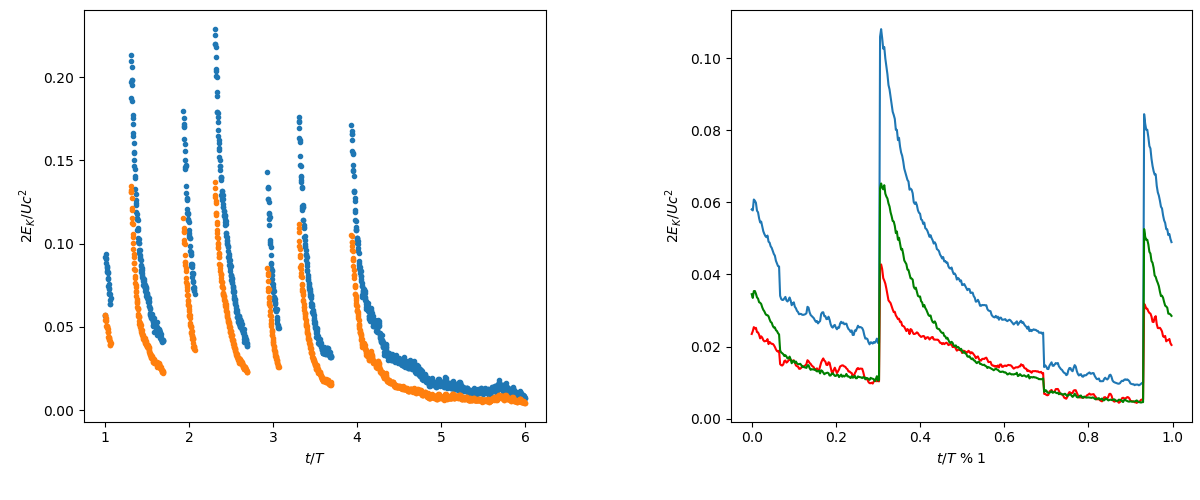

In [5]:
r.plot_energy_vs_time()
fig = plt.gcf()
fig.set_size_inches(12, 5, forward=1)

# Fit of energy decay

<div align="middle"> <img src="./fig/fig_fit_EK.png"  style="height: 500px"> </div>

# $[F_h, \R]$ diagram from fit of kinetic energy decay

<div align="middle"> <img src="./fig/fig_R_vs_Fh.png"  style="height: 650px"> </div>

# MlLESTONE campaigns in the $[F_h,\ \R]$ parameter space

<div class="fragment fade-out" data-fragment-index="0" style='float:left;width:100%'>
  <div align="middle"> 
    <img src="./fig/fig_R_vs_Fh_other_studies_with_milestone.png"  style="height: 550px">
  </div>
</div>

<div class="fragment current-visible" data-fragment-index="0" style='float:left;width:100%'>
  <div align="middle"> 
    <img src="./fig/fig_R_vs_Fh_other_studies_with_milestone17.png"  style="height: 550px">
  </div>
</div>

# Density profiles

In [20]:
from fluidcoriolis.milestone17.time_signals import SignalsExperiment
signals = SignalsExperiment(iexp)

/fsnet/project/watu/2017/17MILESTONE/Data/Exp21_2017-07-11_D0.5_N0.55_U0.12


<IPython.core.display.Javascript object>


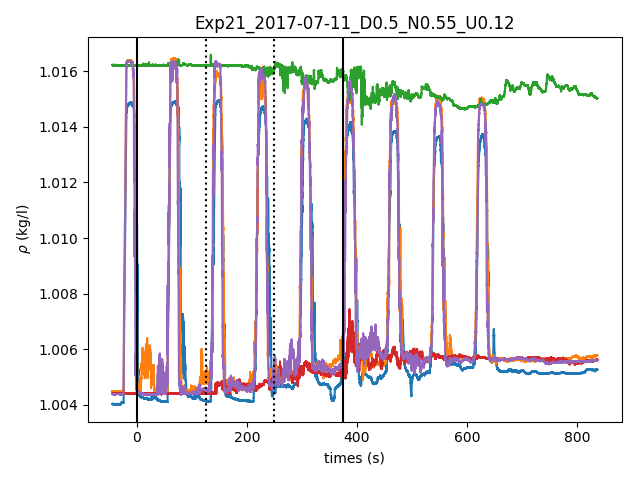

In [21]:
signals.plot_vs_times()

<IPython.core.display.Javascript object>


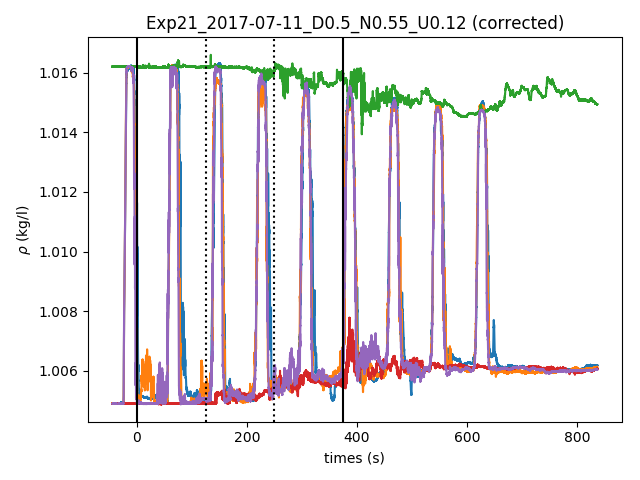

In [22]:
signals.plot_vs_times(corrected=1)

<IPython.core.display.Javascript object>


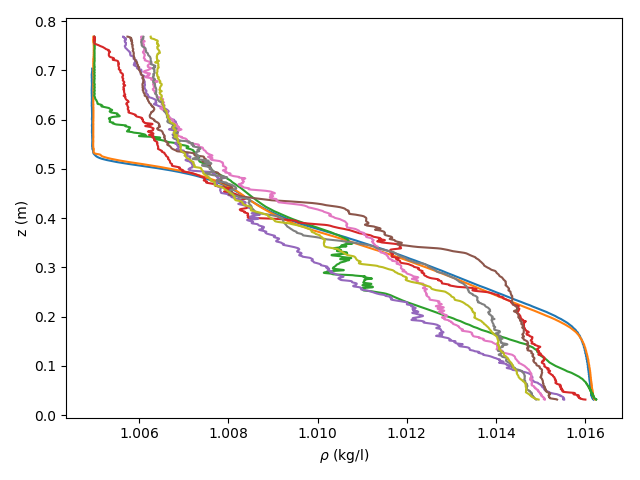

In [23]:
probe = signals.probes_profiles[0]
probe.plot_profiles(corrected=1)

<IPython.core.display.Javascript object>


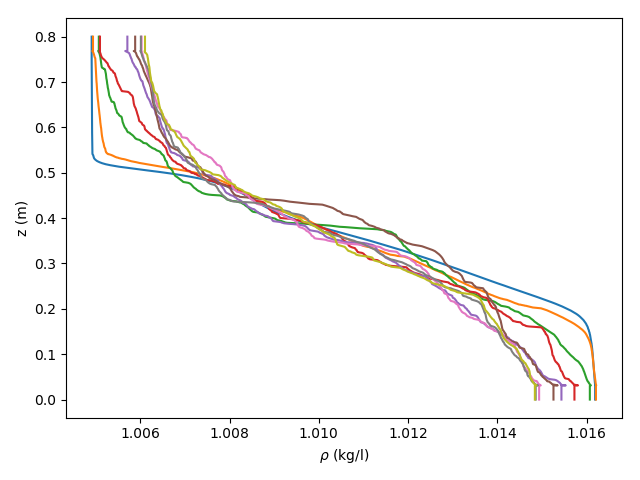

In [24]:
signals.plot_profiles_probe_averaged(corrected=1, sort=1, extend=1, len_extend=0.005)

Mass conservation check:
max(m/m0 - 1) = 1.6755e-04


<IPython.core.display.Javascript object>


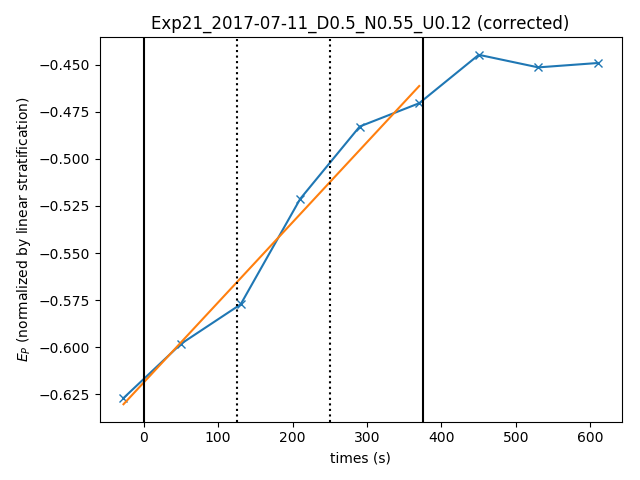

non-dimensional mixing: 0.001983362753471777


In [25]:
signals.plot_energy_pot_vs_time()

# Dimensionless potential energy dissipation

$$ \frac{\eps_P}{(3\times10^{-3} U_c^3/D_c)}$$

<div align="middle"> <img src="./fig/fig_dt_pot_energy.png"  style="width: 60%"> </div>

# Conclusions on mixing by stratified turbulence

<br />

- New experimental setup in the Coriolis platform with many new development and improvements

<br />

- Experimental flow close to the strongly stratified regime! 

  We should be able to get strongly stratified turbulence by using alcool

<br />

- Good measurements of the mixing (with MILESTONE17)

  $\Rightarrow$ soon good evaluation of the mixing coefficient

<br />

- Many things to look at in the data (soon open)

# Numerical simulations

Easier than experiments! :-) 

## [fluidfft](https://foss.heptapod.net/fluiddyn/fluidfft): unified API (C++ / Python) for Fast Fourier Transform libraries 

<br />

- highly distributed, MPI, 
- CPU and GPU, 
- 2D and 3D

## [fluidsim](https://foss.heptapod.net/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D

<br />

- highly modular (object oriented solvers)
- efficient (Cython, Pythran, mpi4py, h5py)
- inline data processing

# Conclusions on open science

- Science in fluid mechanics with open-source methods and Python

- Open-data: data in auto-descriptive formats (hdf5, netcdf, ...) + code to use and understand the data

- Development of *open-source*, *clean*, *reusable* codes (fluiddyn project)

<br />

## Issues

- Collaborative dynamics? Adoption by the community? Developpers?
- Level in Python and coding in the community ! => [Python training sessions in the lab and at university](https://python-uga.sciencesconf.org/)